In [54]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)

if response.status_code == 200:
    data_json = response.json()
    df = pd.DataFrame(data_json)
    print("Datos cargados correctamente.")
else:
    print("Error al acceder a los datos.")


Datos cargados correctamente.


In [55]:
# Revisamos los tipos de datos
print(df.dtypes)

# Buscamos columnas que contengan diccionarios (datos anidados)
for col in df.columns:
    if isinstance(df[col][0], dict):
        print(f"La columna '{col}' contiene datos anidados.")

# Mostramos los primeros registros para conocer los datos
print(df.head())

# Creamos un diccionario de datos simple para referencia
diccionario = {
    'customer': 'Información del cliente',
    'phone': 'Datos del servicio telefónico',
    'internet': 'Datos del servicio de internet',
    'account': 'Información de facturación',
    'Churn': 'Indica si el cliente abandonó el servicio (Sí/No)'
}

for clave, descripcion in diccionario.items():
    print(f"{clave}: {descripcion}")


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
La columna 'customer' contiene datos anidados.
La columna 'phone' contiene datos anidados.
La columna 'internet' contiene datos anidados.
La columna 'account' contiene datos anidados.
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneServ

In [56]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Eliminamos las columnas originales anidadas
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Concatenamos las nuevas columnas desanidadas
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

print("Datos después de la normalización:")
print(df.head())


Datos después de la normalización:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes         

In [57]:
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nCantidad de registros duplicados:")
print(df.duplicated().sum())

# (Opcional) Eliminamos duplicados si es necesario
df = df.drop_duplicates()


Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Cantidad de registros duplicados:
0


In [58]:
# Ejemplo: Rellenar valores nulos en una columna específica
# Ajustar 'nombre_columna' y 'valor_por_defecto' según el dataset
if 'nombre_columna' in df.columns:
    df['nombre_columna'].fillna('valor_por_defecto', inplace=True)

# También estandarizar texto en columnas categóricas
if 'gender' in df.columns:
    df['gender'] = df['gender'].str.lower().str.strip()



In [59]:
print(df.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [60]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
print("Columna 'Cuentas_Diarias' creada correctamente.")



Columna 'Cuentas_Diarias' creada correctamente.


In [61]:
# Convertimos la columna 'Churn' de Sí/No a 1/0
df['Churn_bin'] = df['Churn'].map({'Sí': 1, 'No': 0})

# Renombrar columnas para mayor claridad
df.rename(columns={
    'gender': 'Genero',
    'tenure': 'Meses_Contrato',
    'Contract': 'Tipo_Contrato',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Facturacion_Mensual',
    'Charges.Total': 'Facturacion_Total'
}, inplace=True)

print("Columnas renombradas y variable 'Churn' convertida a binaria.")


Columnas renombradas y variable 'Churn' convertida a binaria.


In [62]:
print("Análisis descriptivo general:")
print(df.describe(include='all'))


Análisis descriptivo general:
        customerID Churn Genero  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   NaN    NaN       0.000000     NaN        NaN   
25%            NaN   NaN    NaN       0.000000     NaN        NaN   
50%            NaN   NaN    NaN       0.000000     NaN        NaN   
75%            NaN   NaN    NaN       0.000000     NaN        NaN   
max            NaN   NaN    NaN       1.000000     NaN        NaN   

        Meses_Contrato PhoneService MultipleLines InternetService  ...  \
count      7267.000000         7267          7267            7267  

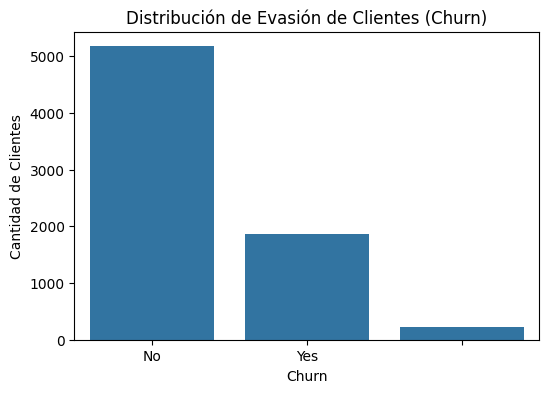

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Evasión de Clientes (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de Clientes")
plt.show()


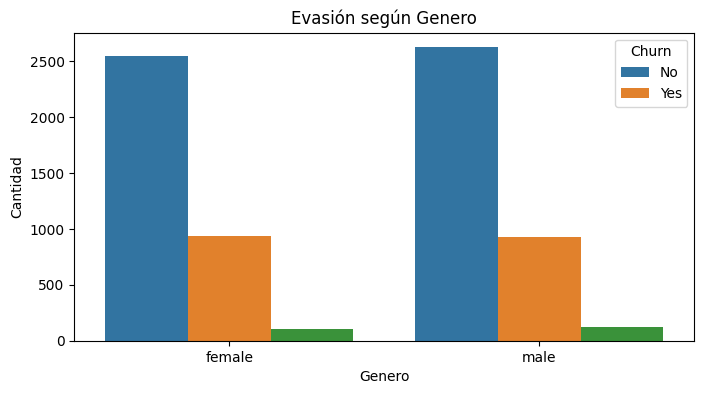

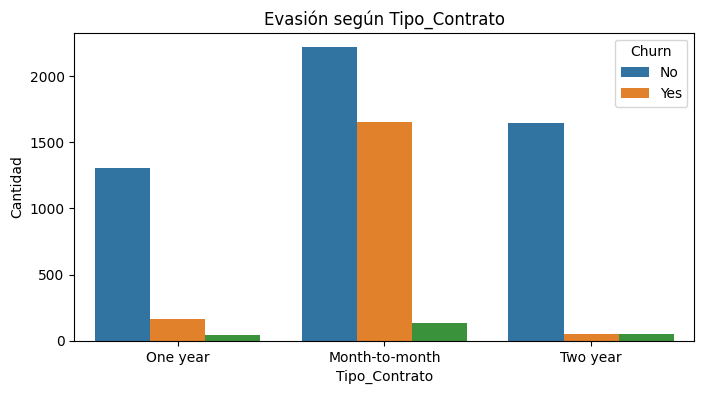

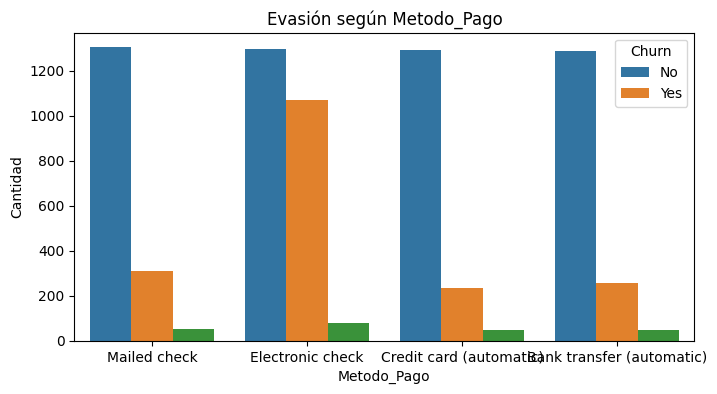

In [64]:
categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pago']  # Ajusta según tus columnas

for cat in categoricas:
    if cat in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(x=cat, hue='Churn', data=df)
        plt.title(f"Evasión según {cat}")
        plt.xlabel(cat)
        plt.ylabel("Cantidad")
        plt.legend(title='Churn')
        plt.show()


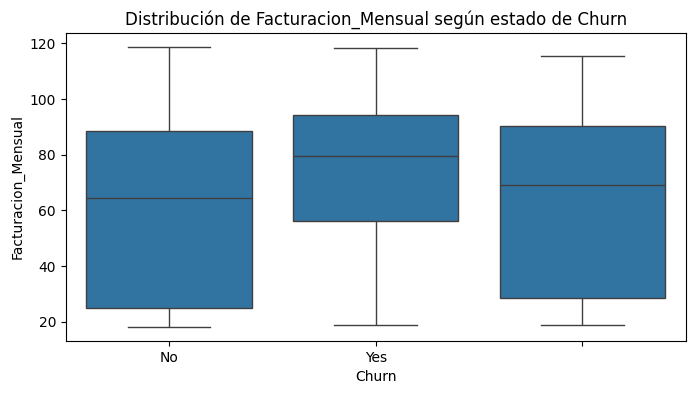

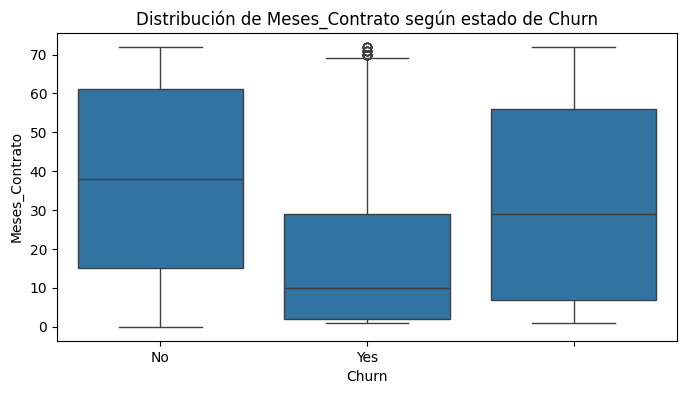

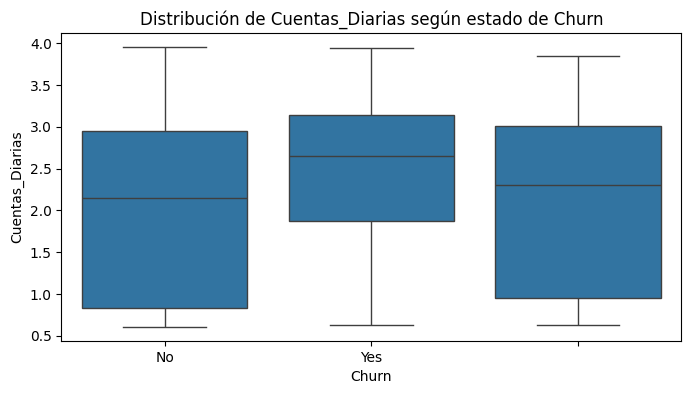

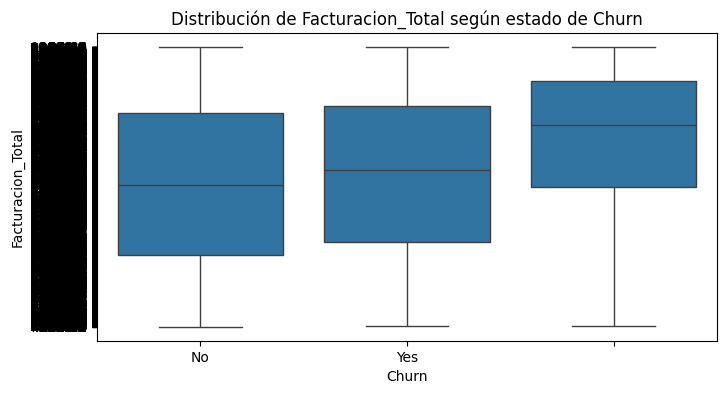

In [65]:
numericas = ['Facturacion_Mensual', 'Meses_Contrato', 'Cuentas_Diarias', 'Facturacion_Total']

for num in numericas:
    if num in df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(x='Churn', y=num, data=df)
        plt.title(f"Distribución de {num} según estado de Churn")
        plt.xlabel('Churn')
        plt.ylabel(num)
        plt.show()


# Informe del Análisis de Evasión de Clientes (Churn)

## Introducción

El objetivo de este análisis es estudiar el fenómeno de evasión de clientes (churn) en la empresa TelecomX. La evasión representa la pérdida de clientes y es crucial identificar patrones que permitan diseñar estrategias efectivas para mejorar la retención y fidelización.

## Limpieza y Tratamiento de Datos

Se importaron los datos en formato JSON desde una fuente externa y se normalizaron las estructuras anidadas para obtener un DataFrame limpio. Se verificó la existencia de valores nulos y registros duplicados, confirmando la calidad del dataset. Además, se creó una nueva columna llamada "Cuentas_Diarias" para obtener una perspectiva diaria del gasto mensual de cada cliente. Se estandarizaron variables categóricas, convirtiendo los valores de "Sí" y "No" a valores binarios, y se renombraron columnas para facilitar el análisis.

## Análisis Exploratorio de Datos

Se realizó un análisis descriptivo general para comprender la distribución y características principales de las variables. La variable objetivo, "Churn", fue visualizada para conocer la proporción de clientes que permanecen y los que se dieron de baja. Posteriormente, se analizaron variables categóricas como género, tipo de contrato y método de pago, para evaluar cómo influyen en la evasión. Finalmente, se compararon variables numéricas relevantes, como la facturación mensual, duración del contrato y gasto diario, entre clientes que abandonaron y los que permanecieron.

## Conclusiones e Insights

El análisis revela que ciertos perfiles de clientes, especialmente aquellos con contratos específicos o métodos de pago determinados, presentan una mayor propensión a la evasión. Además, los clientes con facturación mensual más alta o con contratos más cortos tienden a cancelar el servicio con mayor frecuencia. Estos patrones ofrecen una base para focalizar esfuerzos en segmentos de clientes más vulnerables a la evasión.

## Recomendaciones

Se sugiere desarrollar estrategias personalizadas orientadas a los grupos con mayor riesgo de churn. Esto puede incluir ofertas especiales, ajustes en planes o métodos de pago, y acciones proactivas de fidelización. Asimismo, un monitoreo continuo de estos indicadores ayudará a anticipar posibles cancelaciones y reducir la tasa de evasión en el tiempo.
